In [14]:
import lda
from scipy import sparse
import numpy as np
import json
import gensim 

In [15]:
X_train = sparse.load_npz('/Users/tingchen/Desktop/Yelp Project/data_n_20_removed/X_train.npz')
cc= np.load("/Users/tingchen/Desktop/Yelp Project/data_n_20_removed/y_train.npy")

In [16]:
locs = []
with open("/Users/tingchen/Desktop/Yelp Project/locs_train.json", 'r') as file:
    locs = json.load(file)

In [17]:
ix = X_train.getnnz(1)>0
X_train = X_train[ix]
cc= cc[ix]
locs= np.array(locs)[ix]

In [50]:
locs_eth = {eth:[] for eth in range(3)}

for i, c in enumerate(cc):
    locs_eth[c].append(locs[i]) 

In [56]:
len(locs_eth[0])

141645

In [57]:
import sklearn

In [58]:
dpgmm = sklearn.mixture.BayesianGaussianMixture(verbose=1, n_components=3, max_iter=500)

In [59]:
eth_regions = {eth:[] for eth in range(3)}

for i in range(3):
    eth_regions[i].append(dpgmm.fit_predict(locs_eth[i]))

Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True
Initialization 0
Initialization converged: True


In [18]:
model = lda.LDA(n_topics= 10, n_regions = 4, n_iter=1500)
model.fit_complete(X_train.astype(np.int32)[:10000], cc.astype(np.int32)[:10000], locs[:10000])

all zero column in document-term matrix found
/Users/tingchen/Desktop/Yelp_Cultural_Analysis/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):


Initialization 0
Initialization converged: True
Finished initializing
0/1500: -93182.5166911668
10/1500: -80730.1450299493
20/1500: -78560.91799626015
30/1500: -77261.25978814578
40/1500: -76542.05356971279
50/1500: -76061.8468087264
60/1500: -75731.30236167101
70/1500: -75240.1049094306
80/1500: -75052.10409985784
90/1500: -74942.85277357559
100/1500: -74689.41217326734
110/1500: -74395.43975070692
120/1500: -74287.99753356527
130/1500: -74299.14543341017
140/1500: -74260.29280891693
150/1500: -74123.57102967844
160/1500: -73956.24337420017
170/1500: -73946.70420236379
180/1500: -74028.2046173142
190/1500: -73816.67455972373
200/1500: -73693.49021650042
210/1500: -73695.41899947207
220/1500: -73602.31410201472
230/1500: -73397.97229176034
240/1500: -73219.5288051578
250/1500: -73097.0605371813
260/1500: -73046.80771000302
270/1500: -72918.02155164458
280/1500: -72814.56091224584
290/1500: -72575.97370261597
300/1500: -72652.639870657
310/1500: -72334.37737985777
320/1500: -72258.11553

In [ ]:
model._rands.shape

In [ ]:
model = lda.LDA(n_topics=25, n_iter=3000)
model.fit(X_train.astype(np.int32)[:30000], cc.astype(np.int32)[:30000])

In [19]:
dic = gensim.corpora.Dictionary.load("/Users/tingchen/Desktop/Yelp Project/big_lexicon_n_20_removed")

In [21]:
regions_locs = {i:[] for i in range(4)}

for i, reg in enumerate(list(model.RS)):
    regions_locs[reg].append(model.LS[i])

In [22]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [23]:
gdf_regions = {}

for key in regions_locs.keys():
    df = pd.DataFrame(regions_locs[key], columns= ['lat', 'long'])
    gdf_regions[key] = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.long, df.lat))

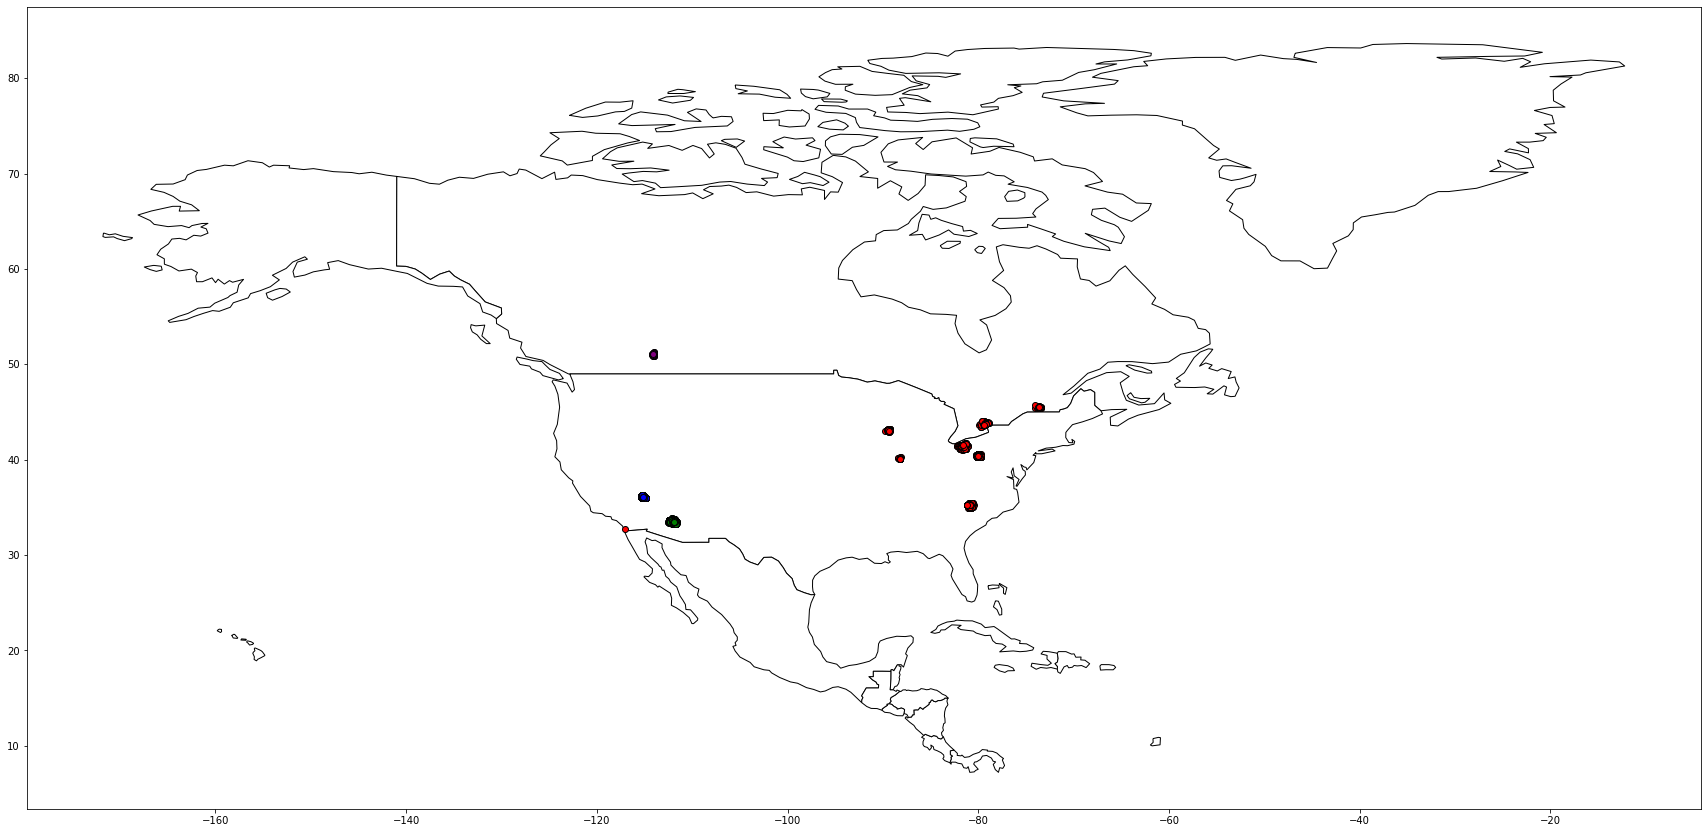

In [42]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', figsize = (30, 30))


colors= ['red', 'blue', 'green', 'purple']

for key, val in gdf_regions.items():
    val.plot(ax=ax, color=colors[key], edgecolor='black')

plt.show()

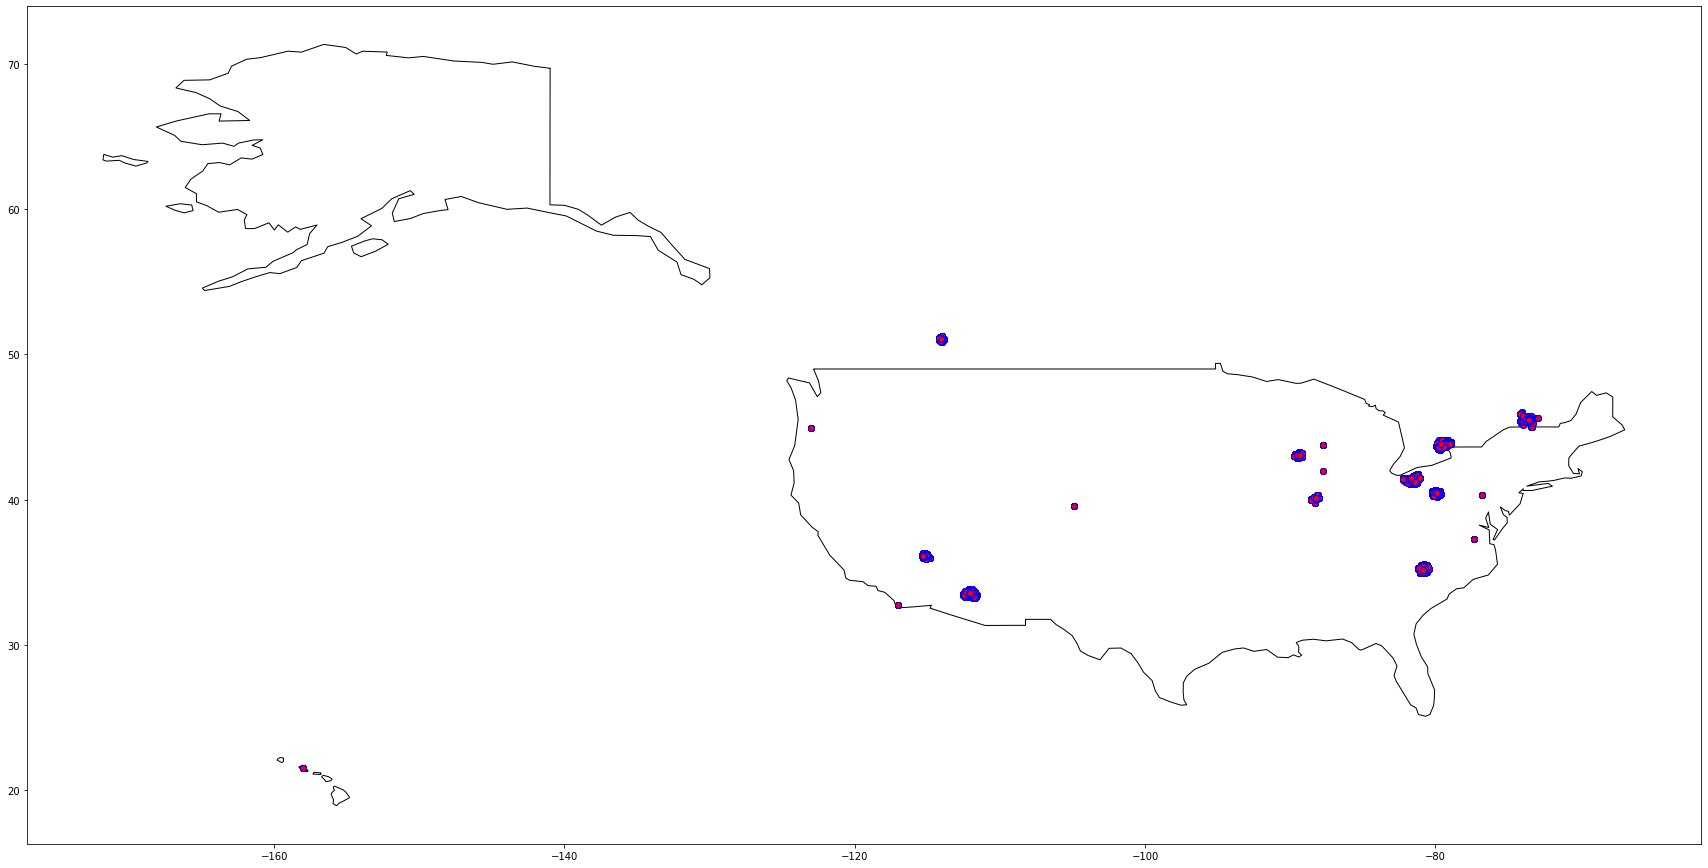

In [61]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black', figsize = (30, 30))


colors= ['red', 'blue', 'green', 'purple']

df = pd.DataFrame(locs, columns= ['lat', 'long'])
val = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.long, df.lat))


val.plot(ax=ax, color='red', edgecolor='blue')

plt.savefig('training_set_locations.png', bbox_inches='tight')

1500 iterations

In [16]:
n_top_words = 15
n_regions=3
topic_word = model.topic_word_  
collection_word = model.topic_word_collection_ 

collections = ['Chinese', 'Italian', 'Mexican']

lexicon = np.array(list(dic.values()))

for i, topic_dist in enumerate(topic_word):
    topic_words = lexicon[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}\n'.format(i, ' '.join(topic_words)))
    
    collection_words = collection_word[i, :, :, :]
    
    for j, eth in enumerate(collections):
        print('Cuisine {}:'.format(eth))
        
        region_words = collection_words[:, j, :]

        for k in range(n_regions):
            topic_words = lexicon[np.argsort(region_words[:, k])][:-n_top_words:-1]
            print('region {}: {}'.format(k, ' '.join(topic_words)))
        print('\n')
    print("\n")
    
    

Topic 0: tacos vegas las fortune dim montreal poke certificate james shitty taco piano luna gift

Cuisine Chinese:
region 0: wood chalky friday/saturday champion plebes response wagner w/corn sogginest aparently enriching coward 7,000+ flash-forward
region 1: shoney blister ghettos home-team honker over-privileged pegao southies starship vietnamese/northern holbert eucharist 'gwai peanut/treenut
region 2: electronic showmanship pets stamps marine all-chinese fabrique rehydrate errupted jiaozhi investigation discreetly money-cats tough/lean


Cuisine Italian:
region 0: carluccio chorus liberace arcades furry spy dancers vincent italian/american clown beams mobster-ish icq cautions
region 1: tuck-in holbert southies colorant blister casse-croute ghettos home-team honker over-privileged pegao starship qould vietnamese/northern
region 2: premiere qdoba demand poppin 1960 fold lebanon thin. frozen/institutional japanese/thai/italian earmarked sqaure wrongly softly


Cuisine Mexican:
region 

region 0: mildew lago 54 29th diner nails bomboloni 1st 1985 greek-town bar/pizza cock untidy jambalaya
region 1: family- jets well-seasoned dinner holbert eucharist honker over-privileged pegao southies starship vietnamese/northern 'gwai ghettos
region 2: d sweating chow 3ppl basing altho drowned chuckle precedence loss undecided da exceptional capitalize


Cuisine Mexican:
region 0: birria modelo camarones crema dat cantaloupe promotional está lanterns tap- ingenuity mobility bum 0.
region 1: papusas ground sweets opener curve hype hamburguesa divulge everthing swirl mixtas tienes boatloads pubs
region 2: panchero 5:30pm benefited slash options/combos satisfies unusually a-okay trimmings dawn tequenos inadvertently ghostbusters laughter




Topic 7: dance health bouncer police sodium steve department grams award charro bouncers cancer arm edm

Cuisine Chinese:
region 0: rowdy fiji slumber crappy 12.20 pickpockets steven divider church sponsored night/early vale bring convenience
regi

1000 iterations

In [ ]:
n_top_words = 15
topic_word = model.topic_word_  
collection_word = model.topic_word_collection_ 
collections = ['Chinese', 'Italian', 'Mexican']

lexicon = np.array(list(dic.values()))

for i, topic_dist in enumerate(topic_word):
    topic_words = lexicon[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}\n'.format(i, ' '.join(topic_words)))
    
    collection_words = collection_word[i, :, :]
    
    for i, eth in enumerate(collections):
        topic_words = lexicon[np.argsort(collection_words[:, i])][:-n_top_words:-1]
        print('Cuisine {}: {}'.format(eth, ' '.join(topic_words)))
    print("\n")